In [1]:
import gudhi as gd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
point_cloud = [[1.05, 2.00, 2.16], [2.96, 1.84, 2.09], [2.49, 2.77, 1.87], [1.99, 2.42, 2.82],
[1.59, 1.42, 2.66], [2.27, 1.59, 1.16], [1.69, 1.24, 2.60], [2.22, 2.76, 2.53],
[2.50, 2.74, 2.07], [2.55, 1.59, 1.30], [1.80, 1.15, 1.47], [1.31, 2.40, 1.44],
[1.92, 1.06, 1.64], [2.29, 1.97, 1.01], [2.25, 2.94, 2.29], [2.38, 2.57, 2.71],
[1.19, 1.83, 1.55], [1.53, 2.80, 2.24], [1.52, 2.82, 1.81], [1.66, 2.58, 2.66],
[2.05, 1.76, 2.98], [1.41, 1.96, 1.29], [1.70, 2.51, 2.81], [1.79, 1.74, 2.88],
[2.89, 1.84, 2.16], [2.16, 1.63, 1.08], [1.62, 1.27, 2.63], [2.91, 2.27, 2.29],
[1.05, 2.05, 1.59], [2.60, 1.91, 2.82], [1.21, 1.68, 2.64], [1.67, 3.00, 1.80],
[1.76, 1.09, 2.21], [0.99, 1.66, 2.29], [2.57, 1.95, 1.17], [1.31, 1.45, 2.63],
[0.99, 1.90, 1.84], [2.88, 2.63, 2.05], [2.13, 1.96, 1.08], [2.62, 2.76, 2.47],
[2.35, 2.64, 2.69], [2.52, 2.94, 2.19], [1.68, 1.25, 2.55], [1.03, 2.11, 1.74],
[2.49, 2.15, 2.89], [1.37, 2.46, 1.35], [2.21, 1.05, 2.40], [1.20, 1.73, 2.36],
[1.67, 1.15, 1.95], [2.45, 2.27, 1.14]]
point_cloud_mat = np.matrix(point_cloud)

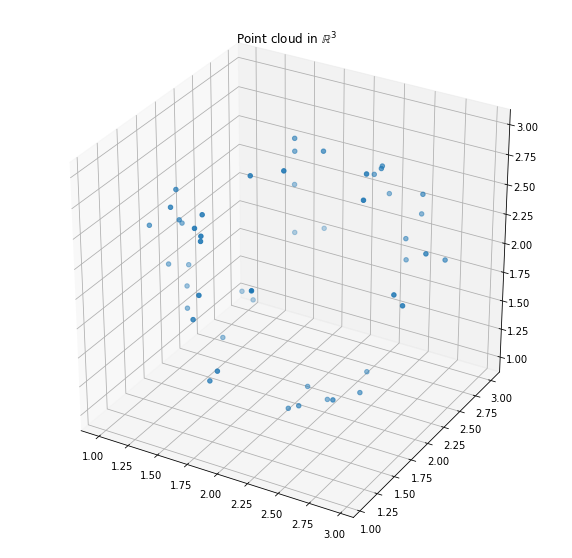

In [3]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(point_cloud_mat[:,0], point_cloud_mat[:,1], point_cloud_mat[:,2])
plt.title(r'Point cloud in $\mathbb{R}^3$')
plt.show()

In [4]:
rips = gd.RipsComplex(points=point_cloud)

In [5]:
max_dim = 2
simplex_tree = rips.create_simplex_tree(max_dimension=max_dim+1)

In [ ]:
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    print(fmt % tuple(filtered_value))

In [ ]:
for sk_value in simplex_tree.get_skeleton(15):
    print(sk_value)

# Persistence barcode

In [6]:
diag = simplex_tree.persistence(min_persistence=0.01)

Deprecated parameter. It has been replaced by max_intervals


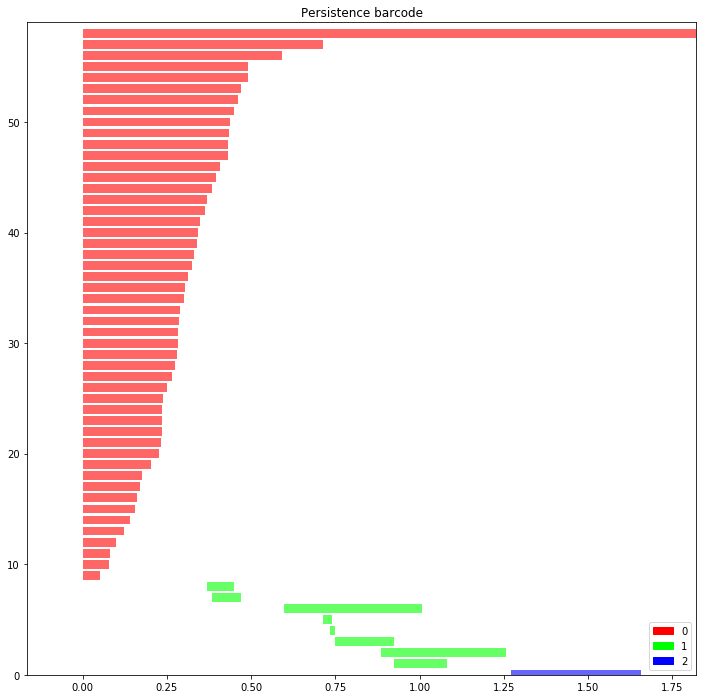

In [7]:
plt.figure(figsize=(12,12))
plot = gd.plot_persistence_barcode(diag, legend=True)
#plot.legend(labels = np.arange(max_dim), loc='upper right')
plot.show()

In [10]:
print('{', end='')
for x in diag:
    if x[0] != 1: continue
    if x[1][1] == float('inf'): continue
    print("{%.4lf, %.4lf}," % (x[1][0], x[1][1]), end=' ')
print('}')

{{0.5978, 1.0064}, {0.8857, 1.2557}, {0.7500, 0.9235}, {0.9245, 1.0811}, {0.3833, 0.4687}, {0.3684, 0.4491}, {0.7118, 0.7398}, {0.7352, 0.7495}, }


# Persistence diagram

Deprecated parameter. It has been replaced by max_intervals


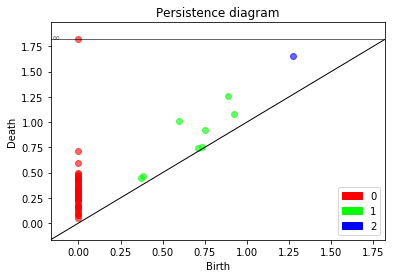

In [14]:
plt = gd.plot_persistence_diagram(persistence=diag, legend=True)
plt.show()

# Persistence landscape

`GUDHI` for `Python` does not have a landscape plotting function (the `C++` version does). We coded our own version, since it is easy enough.

A remark on the implementation: We do not consider the infinite ray.

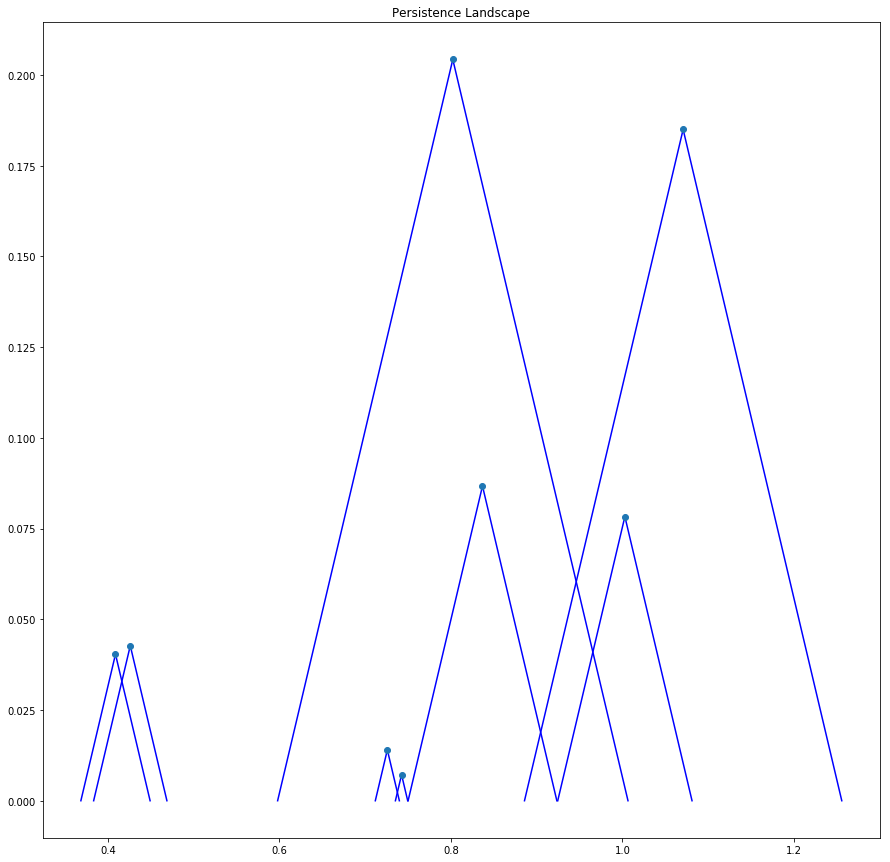

In [16]:
def landscape(bd_coords):
    mh_coords = [((x[0]+x[1])/2, (x[1]-x[0])/2) for x in bd_coords if x[1] != float('inf')]
    mh_coords_mat = np.matrix(mh_coords)
    bd_coords_wo_inf = [x for x in bd_coords if x[1] != float('inf')]
    fig = plt.figure(figsize=(15,15))
    plt.title('Persistence Landscape')
    for i in range(len(mh_coords)):
        mh = mh_coords[i]
        bd = bd_coords_wo_inf[i]
        plt.plot([bd[0], mh[0]], [0, mh[1]], 'b-')
        plt.plot([mh[0], bd[1]], [mh[1], 0], 'b-')

    plt.plot(mh_coords_mat[:,0], mh_coords_mat[:,1], 'o')
    plt.show()
    
    return fig

bd_coords = [x[1] for x in diag if x[0] == 1]
fig = landscape(bd_coords)

We can also implement the $\lambda_k(t)$ functions:

E:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


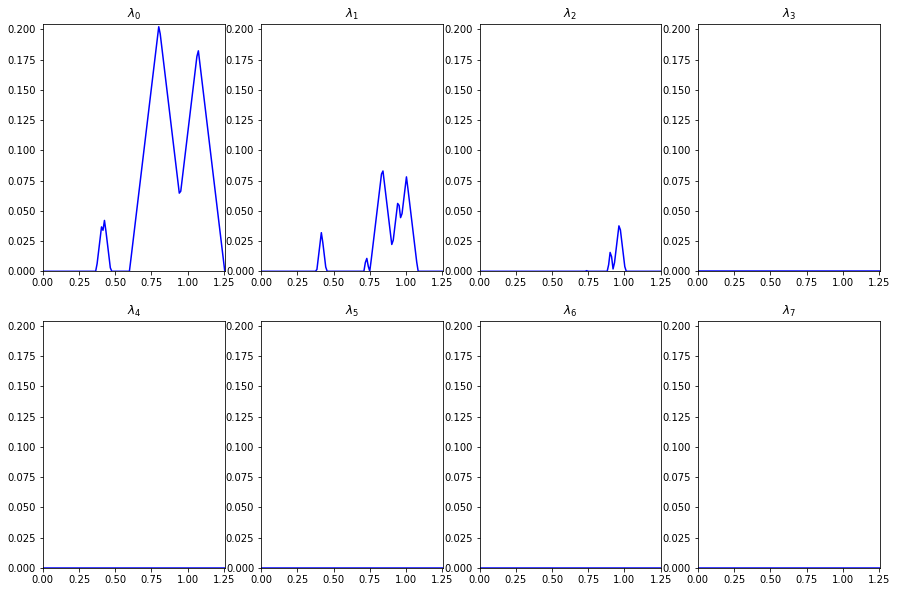

In [21]:
def Lambda(t,b,d):
    return max([0, min([t-b, d-t])])

def lambda_k(t,k,bd):
    l = [Lambda(t,bd[i][0], bd[i][1]) for i in range(len(bd))]
    return sorted(l, reverse=True)[k]
    
def plot_lambda_k(k, bd, axis=None):
    t_min = 0
    t_max = max([max(x[0],x[1]) for x in bd])
    h_min = 0
    mh_coords = [((x[0]+x[1])/2, (x[1]-x[0])/2) for x in bd_coords if x[1] != float('inf')]
    h_max = max([x[1] for x in mh_coords])
    
    if axis == None:
        fig = plt.figure()
        axis = fig.gca()
        
    tt = np.linspace(t_min, t_max, t_max/0.01)
    y = [lambda_k(t,k,bd) for t in tt]
    axis.plot(tt, y, 'b-')
    axis.set_title(r'$\lambda_{%d}$' % k)
    axis.set_xlim([t_min, t_max])
    axis.set_ylim([h_min, h_max])

    if axis == None:
        plt.show()
    
    return axis
    
bd_coords = [x[1] for x in diag if x[1][1] != float('inf') and x[0] == 1]
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
for i in range(len(bd_coords)):
    ax = plt.subplot(int(len(bd_coords)/4.),4,i+1)
    plot_lambda_k(i, bd_coords, ax)
plt.show()

In [22]:
bd_coords

[(0.5978294071054049, 1.0064293318460071),
 (0.8857200460642178, 1.2557467897629682),
 (0.75, 0.9234717104492157),
 (0.9244998647917694, 1.0811105401391665),
 (0.38327535793473594, 0.4687216658103184),
 (0.368374809127877, 0.4491102314577126),
 (0.7117583859709697, 0.7397972695272672),
 (0.735187051028512, 0.7495331880577404)]